<a href="https://colab.research.google.com/github/sa96102/Python_exam/blob/master/Image_Stitching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob, os

import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image path

In [3]:
IMG_NAME = '/content/drive/My Drive/Colab Notebooks/Python_exam/Data/Image_Stitching/01'

img_list = []
for ext in ('0*.gif', '0*.png', '0*.jpg'):
    img_list.extend(glob.glob(os.path.join('imgs', IMG_NAME, ext)))

img_list = sorted(img_list)

print(img_list)

['/content/drive/My Drive/Colab Notebooks/Python_exam/Data/Image_Stitching/01/01.jpg', '/content/drive/My Drive/Colab Notebooks/Python_exam/Data/Image_Stitching/01/02.jpg']


### Load images

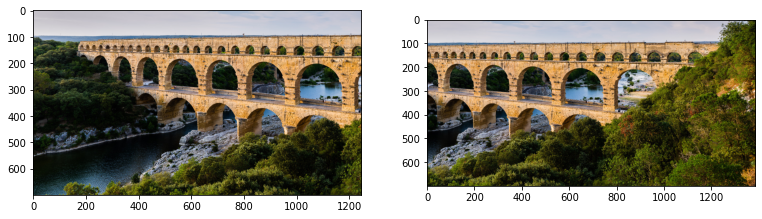

In [4]:
imgs = []

plt.figure(figsize=(20, 20))

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    imgs.append(img)
    
    plt.subplot(len(img_list) // 3 + 1, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Stitch images

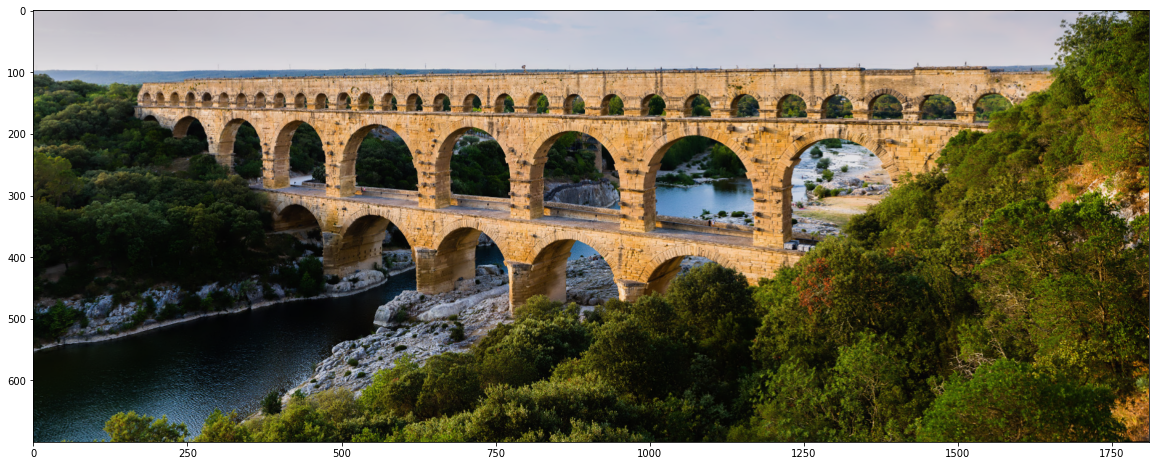

In [5]:
mode = cv2.STITCHER_PANORAMA # 파노라마 이미지 모드.
# mode = cv2.STITCHER_SCANS # 스캔 이미지를 이어붙이는 모드.

if int(cv2.__version__[0]) == 3:
    stitcher = cv2.createStitcher(mode)
else:
    stitcher = cv2.Stitcher_create(mode) # cv2.Stitcher_create()_stitching class를 초기화.
    
status, stitched = stitcher.stitch(imgs) # 이미지 이어붙이기. status는 stitching을 확인할 수 있는 변수.

if status == 0: # 성공적으로 stitching 되었을 때.
    cv2.imwrite(os.path.join('imgs', IMG_NAME, 'result.jpg'), stitched)

    plt.figure(figsize=(20, 20))
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
else:
    print('failed... %s' % status)

### Get image mask

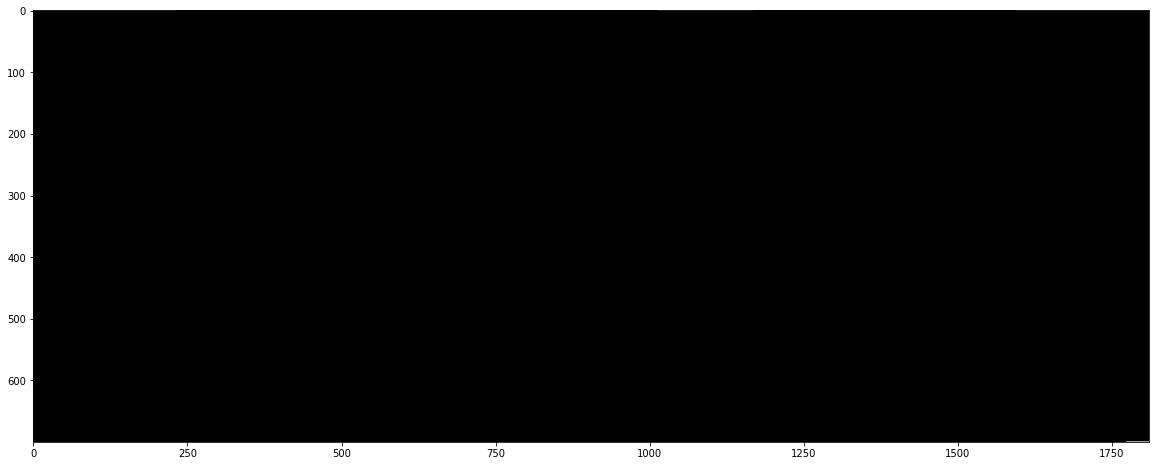

In [6]:
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
thresh = cv2.bitwise_not(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]) # cv2.bitwise_not()_흑백 이미지 반전. 이미지에 임계값을 지정, binary(흑백)으로 만듦. black은 0, white는 255로 설정됨.
thresh = cv2.medianBlur(thresh, 5) # cv2.medianBlur()_이미지 노이즈 제거.(이미지를 뭉개는 효과.)

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')

### Remove margin

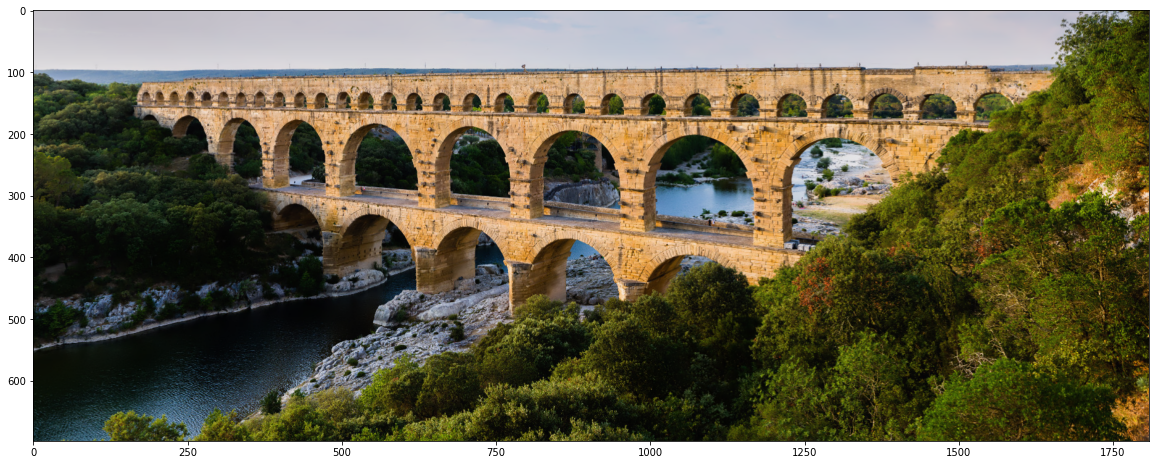

In [7]:
stitched_copy = stitched.copy()
thresh_copy = thresh.copy()

while np.sum(thresh_copy) > 0: # np.sum(thresh_copy)가 0이 되도록.
    thresh_copy = thresh_copy[1:-1, 1:-1]
    stitched_copy = stitched_copy[1:-1, 1:-1]
    
cv2.imwrite(os.path.join('imgs', IMG_NAME, 'result_crop.jpg'), stitched_copy)

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(stitched_copy, cv2.COLOR_BGR2RGB))